# Module 4: Deep Learning for Computer Vision

Computer vision is a subfield of artificial intelligence (AI) that focuses on enabling machines to interpret and make decisions based on visual data, i.e., images or videos. Think of it as teaching machines to "see" and understand the content of digital images like humans do. Its applications are vast and varied and include:

- Facial Recognition: Used in security systems, smartphones, and social media applications.
- Medical Imaging: Assisting doctors in detecting anomalies like tumors in MRI scans.
- Autonomous Vehicles: Enabling cars to navigate on roads by detecting other cars, pedestrians, and obstacles.
- Augmented Reality (AR) and Virtual Reality (VR): Overlaying digital content on the real world or creating immersive virtual worlds.
- Object Detection: Identifying objects within images or real-time video streams.

Given the richness and complexity of visual data, traditional programming approaches, where explicit rules for every possible scenario are written, become infeasible. Instead, machine learning, especially deep learning, has proven highly effective in extracting patterns and understanding content from visual data.

## Goals of this notebook

- become comfortable working with images in Python
- build and train a convolutional neural network in PyTorch

## Working with images in Python

We can load images into iPython and visualize them using the `PIL` library. 

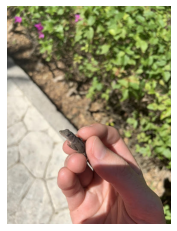

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

# Load a color image using PIL
img = Image.open("lizard.jpeg")

# Display the color image using matplotlib
plt.imshow(img)
plt.axis('off')  # To hide the axis values
plt.show()

While this snippet is helpful for viewing the image, we discussed color images as 3-dimensional metrics! Let's take a look how this image looks when converted to a PyTorch tensor.

In [ ]:
# Convert the image to a PyTorch tensor
transform = transforms.ToTensor()
img_tensor = transform(img)

# Print out the tensor shape to verify
# For a color image, it should have 3 channels (C x H x W format)
print(img_tensor.shape)

## Designing a Convolutional Neural Network in PyTorch

Just like designing simple neural networks with fully connected layers, we can use PyTorch's `nn` module to create convolutional and pooling layers.

Let's design a neural network with:
- 1 convolutional layer
- 1 pooling layer
- 2 fully connected layers

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 32 * 14 * 14)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

## Preparing image data for a convolutional neural network with PyTorch

For training our first simple network, we're going to use the fashion MNIST dataset. This dataset is a simple image recognition dataset for which we can even train a model on our local computer.

In [2]:
# Define transformations (convert to tensor and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


# Download the Fashion MNIST dataset if you don't already have it
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

# Create dataloaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

The data consists of plxielated images of different tyes of clothes. Unlike the color image we were just looking at, these images are in grayscale so they only have one channel. The tensors are of size `torch.Size([1, 28, 28])`. Below, we print a few images and their associated labels. 

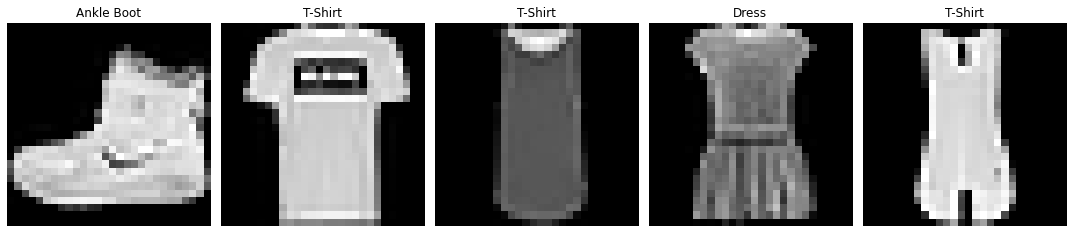

In [5]:
# Define transformations (only converting to tensor here, no normalization for visualization)
transform = transforms.ToTensor()

# Download the Fashion MNIST dataset
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)

# Define class labels for Fashion MNIST
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

# Display a few samples from the dataset
num_samples = 5
fig, axs = plt.subplots(1, num_samples, figsize=(15, 4), tight_layout=True)

for i in range(num_samples):
    img, label = train_dataset[i]
    axs[i].imshow(img.squeeze(), cmap='gray')  # Remove the channel dimension and display in grayscale
    axs[i].set_title(labels_map[label])
    axs[i].axis('off')

plt.show()

## Training the model

Now, we can use the same practice we've previously used to conduct forward and backward passes, updating the weights of our neural network. 

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/5], Loss: 0.3274
Epoch [2/5], Loss: 0.1407
Epoch [3/5], Loss: 0.2300
Epoch [4/5], Loss: 0.2577
Epoch [5/5], Loss: 0.3722


## Evaluate the model 

And evaluate the model on our held out data! Since we didn't train the model for very long, we don't expect a perfect accuracy score - but nonetheless this dataset is simple enough for us to train a model on. 

In [7]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data, targets in test_loader:
        outputs = model(data)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total} %')

Accuracy of the model on the test images: 90.73 %
